1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


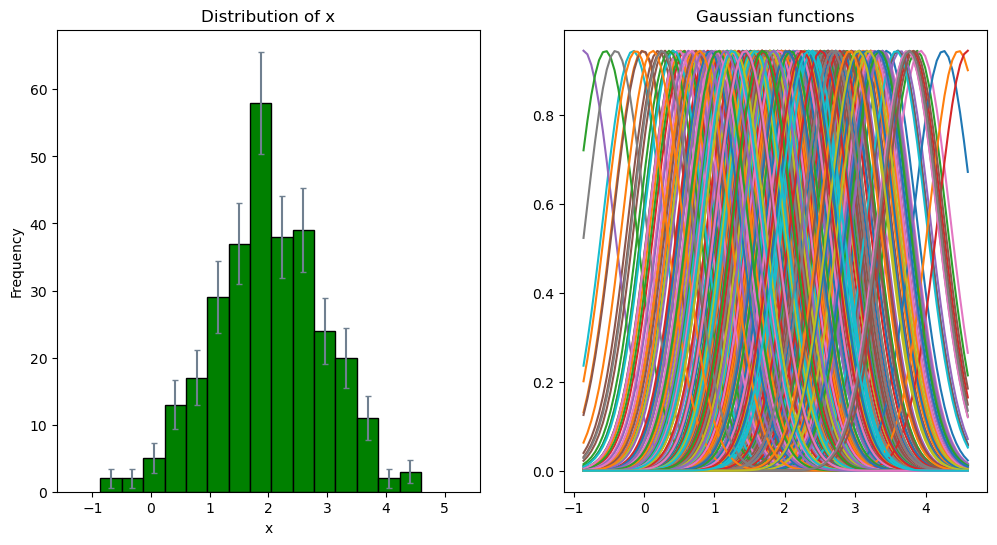

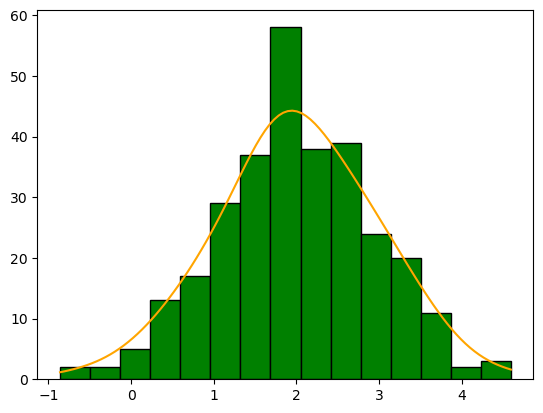

In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import trapz
N, std, mean = 300, 0.9, 2
x = np.random.normal(loc=mean, scale=std, size=N)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# axes 1
n, bins, _ = ax1.hist(x, bins='auto', color='green', edgecolor='black')
errors = np.sqrt(n)
bin_centers = (bins[:-1]+ bins[1:])/2

ax1.errorbar(bin_centers, n, yerr=errors, fmt='none', ecolor='slategray', capsize=2)
ax1.set_xlim(mean-4*std, mean+4*std)
ax1.set_xlabel('x')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of x')

# axes 2
x_axis = np.linspace(min(x) , max(x), 100)
gaussian_sum = np.zeros(shape = np.shape(x_axis))

std_default = 1.06 * np.std(x) * (len(x) ** -0.15)

for value in x:
    std = std_default
    gaussian = stats.norm.pdf(x_axis, loc=value, scale=std)
    ax2.plot(x_axis, gaussian)
    gaussian_sum += gaussian 
    
ax2.set_title("Gaussian functions")
plt.show()

gaussian_area = np.trapz(gaussian_sum, x_axis)

dx = (max(x)-min(x))/(len(bins)-1)
hist_area = 0
for i in n:
    dy = i*dx
    hist_area += dy

gaussian_sum_normalized = gaussian_sum * hist_area / gaussian_area

fig, ax = plt.subplots()
ax.plot(x_axis, gaussian_sum_normalized, color='orange')
ax.hist(x, bins='auto', color='green', edgecolor='black')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

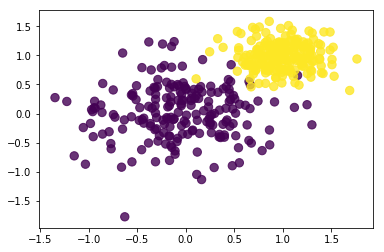

In [13]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

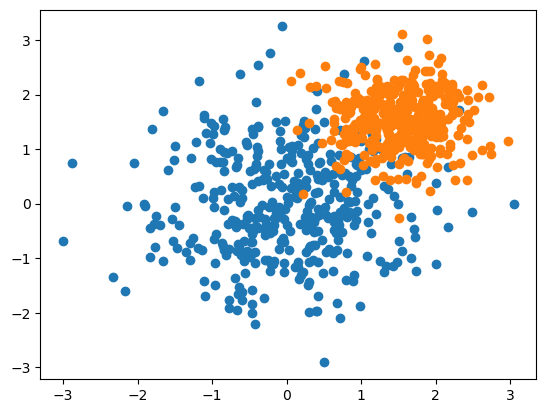

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 2
N = 400
x = np.random.normal(loc=0.0, scale=1, size=(N,2))
y = np.random.normal(loc=1.5, scale=0.5, size=(N,2))
#no need to choose the colors for plotting on top of each other because python itself can differentiate
#for i in range(n):
plt.scatter(x[:,0],x[:,1],marker='o')
plt.scatter(y[:,0],y[:,1],marker='o')



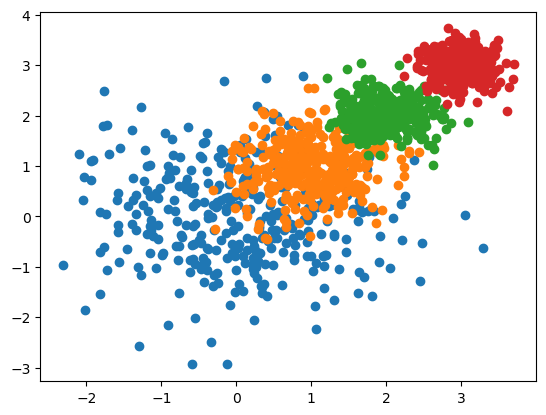

In [15]:
#Generalizing it to n categories
def Gaussian2d(n,N):#scale or std=0.5 for all and mean in steps of 1
    for i in range(n):#n is no. of categories
        x=np.random.normal(loc=1*i, scale=1/(i+1), size=(N,2))#just changing the values of mean and std dev
        plt.scatter(x[:,0],x[:,1])
Gaussian2d(4,350)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [16]:
import pandas as pd
import numpy as np
M = np.load("residuals_261.npy",allow_pickle=True ).item()
#print(M)
df = pd.DataFrame(M)
df.head()


,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [17]:

dfnew = df[np.absolute(df["residuals"])<2]#all the values of residuals less than 2 are named as False and thus not included in dataframe
dfnew = dfnew.reset_index(drop=True)
dfnew.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-0.042857,3.3
3,0.128571,5.3
4,0.085714,15.0


In [18]:
from scipy.stats import linregress
x = dfnew['residuals']
y = dfnew['distances']
slope, intercept, rval, pval, stderr = linregress(x,y)
print("Slope:",slope)
print("Intercept:",intercept)
print("r_value:",rval)
print("p_value:",pval)
print("Standard err of gradient estimate:",stderr)


Slope: 0.5779133666359255
Intercept: 10.025258299436526
r_value: 0.043403510522559065
p_value: 8.717037183576542e-06
Standard err of gradient estimate: 0.12989809632256547


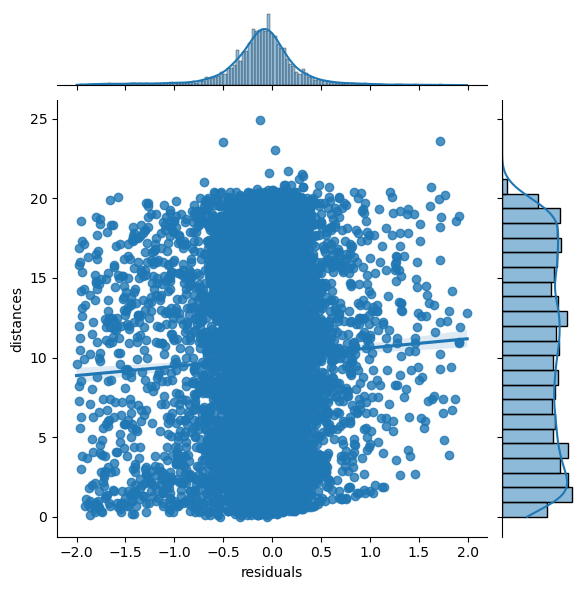

In [19]:
import seaborn as sns
g = sns.jointplot(x="residuals",y= "distances", data=dfnew, kind="reg");

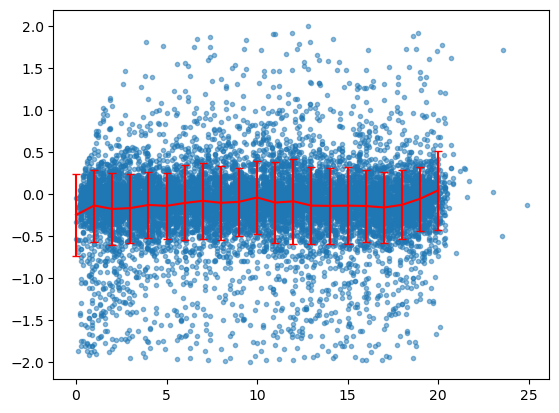

In [20]:
x = np.linspace(0, 20, 21)

y = np.zeros_like(x)
erry = np.zeros_like(x)
for i in x:
    y[int(i)] = np.mean(dfnew[(dfnew['distances']>=i) & ( dfnew['distances']< i+1)]['residuals'])
    erry[int(i)] = np.std(dfnew[(dfnew['distances']>=i) & ( dfnew['distances']< i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(dfnew['distances'], dfnew['residuals'], marker='.', alpha=0.5)
plt.show()